In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing  import scale
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score,r2_score
from sklearn.model_selection import  train_test_split

digits = load_digits()

In [14]:
x_values = digits.data
x_values = scale(x_values)
y_values = digits.target

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.30, random_state=8) 
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [19]:
print(digits.target_names)
matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)

confusion_df = pd.DataFrame(matrix, index=digits.target_names, columns=digits.target_names)




[0 1 2 3 4 5 6 7 8 9]


,0,1,2,3,4,5,6,7,8,9
0,56,0,0,0,0,0,0,0,0,0
1,0,58,0,0,0,0,0,0,1,0
2,0,1,52,0,0,0,0,0,0,0
3,0,0,0,58,0,2,0,1,0,1
4,0,0,0,0,40,0,0,0,1,1
5,0,0,0,0,0,61,0,0,0,1
6,0,0,0,0,0,0,51,0,0,0
7,0,0,0,0,0,0,0,54,0,0
8,0,5,0,0,0,0,0,0,46,0
9,0,0,0,0,0,1,0,0,0,49


In [20]:
f = f1_score(y_test, y_pred, average=None)
lowest_score = min(f)
hardest_class = digits.target_names[list(f).index(lowest_score)]
print('Hardest class:', hardest_class)

Hardest class: 8


In [21]:
report = classification_report(y_pred=y_pred, y_true=y_test)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.91      0.98      0.94        59
           2       1.00      0.98      0.99        53
           3       1.00      0.94      0.97        62
           4       1.00      0.95      0.98        42
           5       0.95      0.98      0.97        62
           6       1.00      1.00      1.00        51
           7       0.98      1.00      0.99        54
           8       0.96      0.90      0.93        51
           9       0.94      0.98      0.96        50

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



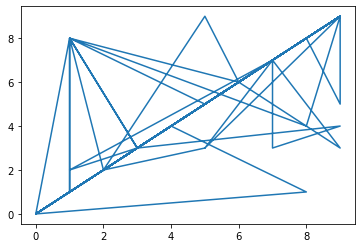

In [22]:
plt.plot(y_pred, y_test)
plt.show()